In [1]:
import pandas as pd ## This structure csv data to a dataframe

df = pd.read_csv('Clean_Dataset.csv')

df # shows the dataframe

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [2]:
df.describe() # enable us to know more (EDA)

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [3]:
df.airline.value_counts()


Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [4]:
df.source_city.value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [5]:
df.destination_city.value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [6]:
df.departure_time.value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

In [7]:
df.arrival_time.value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

In [8]:
df.stops.value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [9]:
df['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [10]:
df['duration'].min()

0.83

In [11]:
df['duration'].max()

49.83

In [12]:
df['duration'].median()

11.25

## Preprocessing

In [13]:
df = df.drop('Unnamed: 0', axis=1) ## Picking relevant dataset
df = df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0) ## Changing dataset to numerical figures

In [14]:
df.stops = pd.factorize(df.stops)[0] 

In [15]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [16]:
df = df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1) ## Renaming  for concatanating processes
df = df.join(pd.get_dummies(df.source_city, prefix='source')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest')).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival')).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time', axis=1)

In [17]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## Training Regression Model

In [18]:
from sklearn.model_selection import train_test_split ## Using Ml model - RFG to test and predict the price dataset 
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis=1), df.price

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2) ## checking the train set and test set, while test is 20% and train is 80%

In [22]:
reg = RandomForestRegressor(n_jobs= -1)

reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [23]:
reg.score(X_test, y_test) ## Test the accuracy of the metrics 

0.9851863035021269

In [24]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9851863035021269
MAE: 1078.2916184692683
MSE: 7662709.316226807
RMSE: 2768.1599152192794


Text(0.5, 1.0, 'Prediction VS Actual Price')

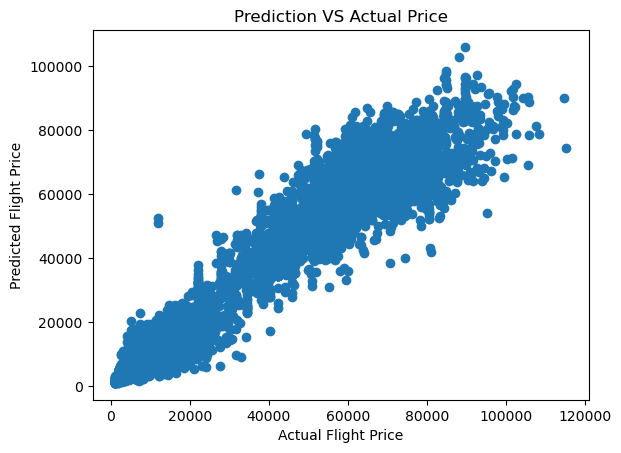

In [25]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title("Prediction VS Actual Price")

In [26]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [27]:
## Check out the vital features used for the prediction
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))

sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('class', 0.8802096993461412),
 ('duration', 0.05748586630712471),
 ('days_left', 0.01863075414600561),
 ('airline_Air_India', 0.005521847637951759),
 ('airline_Vistara', 0.004274760122272043),
 ('source_Delhi', 0.0036963261257833913),
 ('dest_Delhi', 0.003309014293331388),
 ('source_Mumbai', 0.0023104894466709),
 ('dest_Mumbai', 0.001966523545821741),
 ('stops', 0.0017815460117783172),
 ('dest_Kolkata', 0.0017517392892677306),
 ('source_Kolkata', 0.0017146019365517214),
 ('dest_Hyderabad', 0.0015805348867898785),
 ('arrival_Evening', 0.0014924740610287256),
 ('dest_Bangalore', 0.00130588360626729),
 ('source_Hyderabad', 0.0012402288566711742),
 ('arrival_Night', 0.001118854010418087),
 ('departure_Evening', 0.001099328157343981),
 ('source_Bangalore', 0.0010950574977814096),
 ('arrival_Afternoon', 0.001033015872331242),
 ('source_Chennai', 0.0009108336207286586),
 ('dest_Chennai', 0.0008806044766761391),
 ('departure_Morning', 0.0008561112358810008),
 ('departure_Afternoon', 0.000819

<BarContainer object of 10 artists>

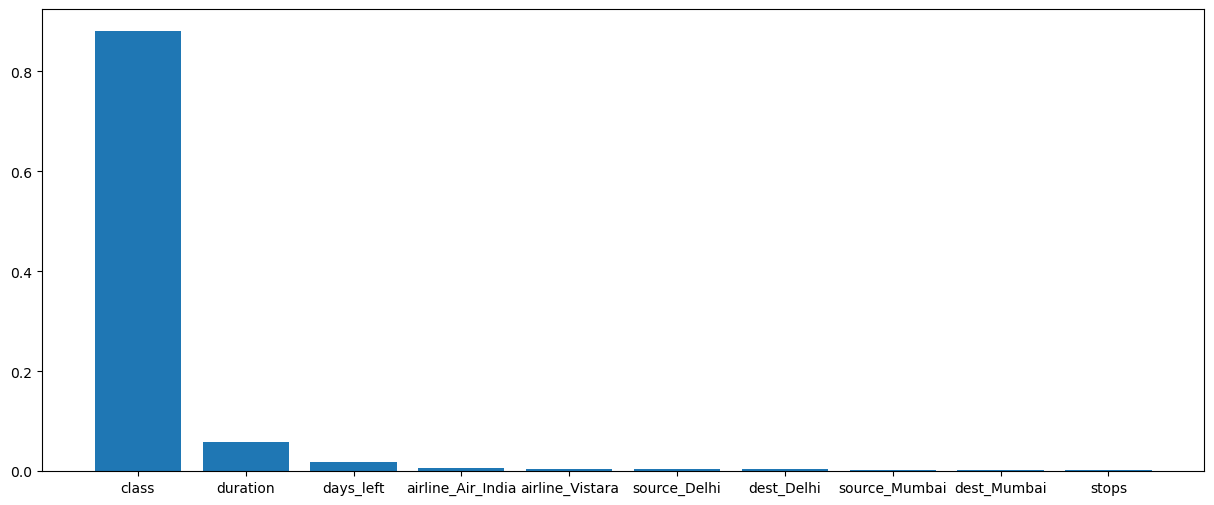

In [28]:
plt.figure(figsize=(15, 6))

plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'auto', 'sqrt']
}

reg = RandomForestRegressor(n_jobs= -1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter= 2, cv= 3,
                                  scoring= 'neg_mean_squared_error', verbose= 2, random_state= 10, n_jobs= -1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Users\ebube\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ebube\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ebube\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ebube\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints

In [34]:
best_regressor.score(X_test, y_test)

0.9860413552062448

In [36]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9860413552062448
MAE: 1095.442842638262
MSE: 7220415.074547129
RMSE: 2687.083004774346


Text(0.5, 1.0, 'Prediction VS Actual Price')

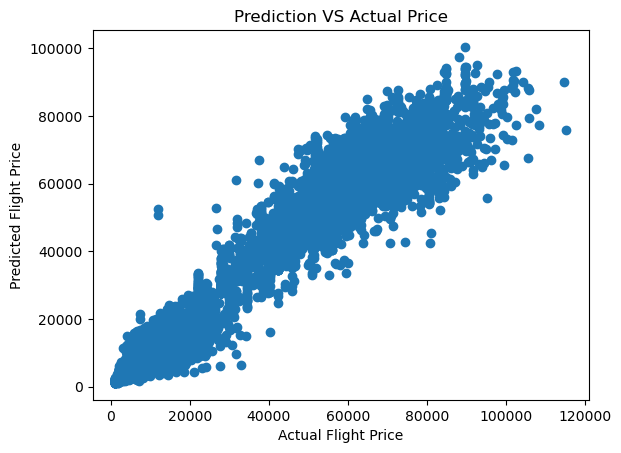

In [37]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title("Prediction VS Actual Price")

In [44]:
best_regressor.predict(X_test)

array([55377.        , 52716.8956272 , 14529.61366037, ...,
       55903.64775918,  5318.11453604,  4686.39547223])